In [160]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [161]:
heart = pd.read_csv("fsheart.csv")


In [162]:
heart.tail(3)

,max_heart_rate_achieved,st_depression,num_major_vessels,thalassemia_reversable defect,chest_pain_type_typical angina,exercise_induced_angina_yes,thalassemia_fixed defect,cholesterol,age,chest_pain_type_non-anginal pain,st_slope_flat,chest_pain_type_atypical angina,resting_blood_pressure,sex_male,target
300,141,3.4,2,1,1,0,0,193,68,0,1,0,144,1,0
301,115,1.2,1,1,1,1,0,131,57,0,1,0,130,1,0
302,174,0.0,1,0,0,0,1,236,57,0,1,1,130,0,0


In [163]:
heart.dtypes

max_heart_rate_achieved               int64
st_depression                       float64
num_major_vessels                     int64
thalassemia_reversable defect         int64
chest_pain_type_typical angina        int64
exercise_induced_angina_yes           int64
thalassemia_fixed defect              int64
cholesterol                           int64
age                                   int64
chest_pain_type_non-anginal pain      int64
st_slope_flat                         int64
chest_pain_type_atypical angina       int64
resting_blood_pressure                int64
sex_male                              int64
target                                int64
dtype: object

In [171]:
X_train, X_test, y_train, y_test = train_test_split(heart.drop('target', 1), heart['target'], test_size = 0.2, random_state=10)

In [172]:
model = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [173]:
estimator = model.estimators_[5]
feature_names = [i for i in X_train.columns]
print(feature_names)
y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values
from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

['max_heart_rate_achieved', 'st_depression', 'num_major_vessels', 'thalassemia_reversable defect', 'chest_pain_type_typical angina', 'exercise_induced_angina_yes', 'thalassemia_fixed defect', 'cholesterol', 'age', 'chest_pain_type_non-anginal pain', 'st_slope_flat', 'chest_pain_type_atypical angina', 'resting_blood_pressure', 'sex_male']


In [174]:
model.predict(X_test)

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [175]:
model.score(X_test,y_test)

0.8032786885245902

In [176]:
model = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=1)
cv_r2_scores_rf = cross_val_score(model, heart.drop('target',1), heart['target'], cv=10,scoring='accuracy')
for row in cv_r2_scores_rf:
 print(row)
print("Mean 10-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

0.9032258064516129
0.8064516129032258
0.8387096774193549
0.9354838709677419
0.8709677419354839
0.7666666666666667
0.7666666666666667
0.8666666666666667
0.7586206896551724
0.7931034482758621
Mean 10-Fold R Squared: 0.8306562847608454


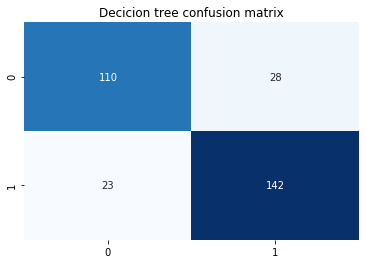

In [177]:
crossmodel = cross_val_predict(model,heart.drop('target', 1),heart['target'],cv=10)
conf_mat = confusion_matrix(heart['target'],crossmodel)
plt.title("Decicion tree confusion matrix")
sns.heatmap(conf_mat,annot=True,cmap="Blues",fmt="d",cbar=False)

In [186]:
recall = conf_mat[1,1]/(conf_mat[1,1]+conf_mat[0,1])
recall

0.8606060606060606

In [187]:
total=sum(sum(conf_mat))
sensitivity = conf_mat[1,1]/(conf_mat[1,1]+conf_mat[0,1])
print('Sensitivity : ', sensitivity )
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[1,0])
print('Specificity : ', specificity)

Sensitivity :  0.8352941176470589
Specificity :  0.8270676691729323
